In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline
INPUT_DIR = "/work/signate_practice/football_forecasting/data"
sns.set()
import warnings
import japanize_matplotlib
warnings.filterwarnings("ignore")
os.chdir(INPUT_DIR)

In [2]:
train = pd.read_csv("train.csv")

In [3]:
print(train.shape)
print(train.info())
train.head()

(1721, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1721 entries, 0 to 1720
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       1721 non-null   int64 
 1   y        1721 non-null   int64 
 2   year     1721 non-null   int64 
 3   stage    1721 non-null   object
 4   match    1721 non-null   object
 5   gameday  1721 non-null   object
 6   time     1721 non-null   object
 7   home     1721 non-null   object
 8   away     1721 non-null   object
 9   stadium  1721 non-null   object
 10  tv       1721 non-null   object
dtypes: int64(3), object(8)
memory usage: 148.0+ KB
None


,id,y,year,stage,match,gameday,time,home,away,stadium,tv
0,13994,18250,2012,Ｊ１,第１節第１日,03/10(土),14:04,ベガルタ仙台,鹿島アントラーズ,ユアテックスタジアム仙台,スカパー／ｅ２／スカパー光／ＮＨＫ総合
1,13995,24316,2012,Ｊ１,第１節第１日,03/10(土),14:04,名古屋グランパス,清水エスパルス,豊田スタジアム,スカパー／ｅ２／スカパー光（Ｊ ＳＰＯＲＴＳ ４）／ＮＨＫ名古屋
2,13996,17066,2012,Ｊ１,第１節第１日,03/10(土),14:04,ガンバ大阪,ヴィッセル神戸,万博記念競技場,スカパー／ｅ２／スカパー光（Ｊ ＳＰＯＲＴＳ １）／ＮＨＫ大阪
3,13997,29603,2012,Ｊ１,第１節第１日,03/10(土),14:06,サンフレッチェ広島,浦和レッズ,エディオンスタジアム広島,スカパー／ｅ２／スカパー光／ＮＨＫ広島
4,13998,25353,2012,Ｊ１,第１節第１日,03/10(土),14:04,コンサドーレ札幌,ジュビロ磐田,札幌ドーム,スカパー／ｅ２／スカパー光（スカイ・Ａ ｓｐｏｒｔｓ＋）／ＮＨＫ札幌


In [4]:
train_add = pd.read_csv("train_add.csv")
print(train_add.shape)
print(train_add.info())
train_add.head()

(232, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232 entries, 0 to 231
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       232 non-null    int64 
 1   y        232 non-null    int64 
 2   year     232 non-null    int64 
 3   stage    232 non-null    object
 4   match    232 non-null    object
 5   gameday  232 non-null    object
 6   time     232 non-null    object
 7   home     232 non-null    object
 8   away     232 non-null    object
 9   stadium  232 non-null    object
 10  tv       232 non-null    object
dtypes: int64(3), object(8)
memory usage: 20.1+ KB
None


,id,y,year,stage,match,gameday,time,home,away,stadium,tv
0,14003,19010,2012,Ｊ１,第２節第１日,03/17(土),14:04,鹿島アントラーズ,川崎フロンターレ,県立カシマサッカースタジアム,スカパー／ｅ２／スカパー光／ＮＨＫ水戸
1,14020,15072,2012,Ｊ１,第３節第２日,03/25(日),19:03,ガンバ大阪,ジュビロ磐田,万博記念競技場,スカパー／ｅ２／スカパー光
2,14023,25743,2012,Ｊ１,第４節第１日,03/31(土),15:03,浦和レッズ,川崎フロンターレ,埼玉スタジアム２００２,スカパー／ｅ２／スカパー光／テレ玉
3,14076,24183,2012,Ｊ１,第１０節第１日,05/06(日),13:03,横浜Ｆ・マリノス,コンサドーレ札幌,日産スタジアム,スカパー／ｅ２／スカパー光
4,14081,20512,2012,Ｊ１,第１０節第１日,05/06(日),17:03,名古屋グランパス,川崎フロンターレ,豊田スタジアム,スカパー／ｅ２／スカパー光（Ｊ ＳＰＯＲＴＳ ４）／名古屋テレビ（録）


In [5]:
train = pd.concat([train, train_add])
train.shape

(1953, 11)

In [6]:
condition = pd.read_csv("condition.csv")
condition_add = pd.read_csv("condition_add.csv")

In [7]:
condition = pd.concat([condition, condition_add])
print(condition.shape)
print(condition.info())
condition.head()

(2304, 31)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2304 entries, 0 to 269
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           2304 non-null   int64  
 1   home_score   2304 non-null   int64  
 2   away_score   2304 non-null   int64  
 3   weather      2304 non-null   object 
 4   temperature  2304 non-null   float64
 5   humidity     2304 non-null   object 
 6   referee      2304 non-null   object 
 7   home_team    2304 non-null   object 
 8   home_01      2304 non-null   object 
 9   home_02      2304 non-null   object 
 10  home_03      2304 non-null   object 
 11  home_04      2304 non-null   object 
 12  home_05      2304 non-null   object 
 13  home_06      2304 non-null   object 
 14  home_07      2304 non-null   object 
 15  home_08      2304 non-null   object 
 16  home_09      2304 non-null   object 
 17  home_10      2304 non-null   object 
 18  home_11      2304 non-null   object 
 

,id,home_score,away_score,weather,temperature,humidity,referee,home_team,home_01,home_02,...,away_02,away_03,away_04,away_05,away_06,away_07,away_08,away_09,away_10,away_11
0,13994,1,0,雨,3.8,66%,木村 博之,ベガルタ仙台,林 卓人,菅井 直樹,...,新井場 徹,岩政 大樹,中田 浩二,アレックス,青木 剛,増田 誓志,小笠原 満男,本山 雅志,大迫 勇也,ジュニーニョ
1,13995,1,0,屋内,12.4,43%,西村 雄一,名古屋グランパス,楢﨑 正剛,田中 隼磨,...,吉田 豊,岩下 敬輔,カルフィン ヨン ア ピン,李 記帝,村松 大輔,河井 陽介,枝村 匠馬,高木 俊幸,アレックス,大前 元紀
2,13996,2,3,晴一時雨,11.3,41%,高山 啓義,ガンバ大阪,藤ヶ谷 陽介,加地 亮,...,近藤 岳登,北本 久仁衛,伊野波 雅彦,相馬 崇人,三原 雅俊,田中 英雄,野沢 拓也,橋本 英郎,森岡 亮太,大久保 嘉人
3,13997,1,0,曇一時雨のち晴,11.4,52%,松尾 一,サンフレッチェ広島,西川 周作,森脇 良太,...,濱田 水輝,阿部 勇樹,槙野 智章,平川 忠亮,鈴木 啓太,山田 直輝,梅崎 司,柏木 陽介,原口 元気,田中 達也
4,13998,0,0,屋内,22.5,32%,廣瀬 格,コンサドーレ札幌,李 昊乗,高木 純平,...,駒野 友一,チョ ビョングク,藤田 義明,山本 脩斗,小林 裕紀,山本 康裕,山田 大記,松浦 拓弥,菅沼 実,前田 遼一


In [8]:
train = pd.merge(train, condition, on="id", how="left")
train.shape

(1953, 41)

In [9]:
stadium = pd.read_csv("stadium.csv")
print(stadium.shape)
print(stadium.info())
stadium.head()

(59, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   name     59 non-null     object
 1   address  59 non-null     object
 2   capa     59 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.5+ KB
None


,name,address,capa
0,名古屋市瑞穂陸上競技場,愛知県名古屋市瑞穂区山下通5-1,20000
1,豊田スタジアム,愛知県豊田市千石町7-2,40000
2,フクダ電子アリーナ,千葉県千葉市中央区川崎町1-20,18500
3,日立柏サッカー場,千葉県柏市日立台1-2-50,15349
4,ニンジニアスタジアム,愛媛県松山市上野町乙46,15576


In [10]:
train = pd.merge(train, stadium, how="left", left_on="stadium", right_on="name")
train.shape

(1953, 44)

In [11]:
train.columns

Index(['id', 'y', 'year', 'stage', 'match', 'gameday', 'time', 'home', 'away',
       'stadium', 'tv', 'home_score', 'away_score', 'weather', 'temperature',
       'humidity', 'referee', 'home_team', 'home_01', 'home_02', 'home_03',
       'home_04', 'home_05', 'home_06', 'home_07', 'home_08', 'home_09',
       'home_10', 'home_11', 'away_team', 'away_01', 'away_02', 'away_03',
       'away_04', 'away_05', 'away_06', 'away_07', 'away_08', 'away_09',
       'away_10', 'away_11', 'name', 'address', 'capa'],
      dtype='object')

In [12]:
train = train.drop("name", axis=1)

In [13]:
train.to_csv("data_all.csv", index=None)

In [14]:
train = pd.read_csv("data_all.csv")

In [15]:
print(train.info())
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1953 entries, 0 to 1952
Data columns (total 43 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           1953 non-null   int64  
 1   y            1953 non-null   int64  
 2   year         1953 non-null   int64  
 3   stage        1953 non-null   object 
 4   match        1953 non-null   object 
 5   gameday      1953 non-null   object 
 6   time         1953 non-null   object 
 7   home         1953 non-null   object 
 8   away         1953 non-null   object 
 9   stadium      1953 non-null   object 
 10  tv           1953 non-null   object 
 11  home_score   1953 non-null   int64  
 12  away_score   1953 non-null   int64  
 13  weather      1953 non-null   object 
 14  temperature  1953 non-null   float64
 15  humidity     1953 non-null   object 
 16  referee      1953 non-null   object 
 17  home_team    1953 non-null   object 
 18  home_01      1953 non-null   object 
 19  home_0

,id,y,year,stage,match,gameday,time,home,away,stadium,...,away_04,away_05,away_06,away_07,away_08,away_09,away_10,away_11,address,capa
0,13994,18250,2012,Ｊ１,第１節第１日,03/10(土),14:04,ベガルタ仙台,鹿島アントラーズ,ユアテックスタジアム仙台,...,中田 浩二,アレックス,青木 剛,増田 誓志,小笠原 満男,本山 雅志,大迫 勇也,ジュニーニョ,宮城県仙台市泉区七北田字柳78,19694
1,13995,24316,2012,Ｊ１,第１節第１日,03/10(土),14:04,名古屋グランパス,清水エスパルス,豊田スタジアム,...,カルフィン ヨン ア ピン,李 記帝,村松 大輔,河井 陽介,枝村 匠馬,高木 俊幸,アレックス,大前 元紀,愛知県豊田市千石町7-2,40000
2,13996,17066,2012,Ｊ１,第１節第１日,03/10(土),14:04,ガンバ大阪,ヴィッセル神戸,万博記念競技場,...,伊野波 雅彦,相馬 崇人,三原 雅俊,田中 英雄,野沢 拓也,橋本 英郎,森岡 亮太,大久保 嘉人,大阪府吹田市千里万博公園5-2,21000
3,13997,29603,2012,Ｊ１,第１節第１日,03/10(土),14:06,サンフレッチェ広島,浦和レッズ,エディオンスタジアム広島,...,槙野 智章,平川 忠亮,鈴木 啓太,山田 直輝,梅崎 司,柏木 陽介,原口 元気,田中 達也,広島県広島市安佐南区大塚西5-1-1,50000
4,13998,25353,2012,Ｊ１,第１節第１日,03/10(土),14:04,コンサドーレ札幌,ジュビロ磐田,札幌ドーム,...,藤田 義明,山本 脩斗,小林 裕紀,山本 康裕,山田 大記,松浦 拓弥,菅沼 実,前田 遼一,北海道札幌市豊平区羊ヶ丘1,39232


In [16]:
def get_month(x):
    return int(x[0:2])
def get_week(x):
    return x[6:7]
def get_match(x):
    return int(x[x.find("第")+1:x.find("節")])
def get_humidity(x):
    return int(x[:-1]) / 100

In [17]:
train["month"] = train["gameday"].apply(get_month) 
print(train["month"].unique())

[ 3  4  5  6  7  8  9 10 11 12]


In [18]:
train["week"] = train["gameday"].apply(get_week)
print(train["week"].unique())

['土' '日' '木' '水' '金' '火' '月']


In [19]:
train["match_num"] = train["match"].apply(get_match)
print(train["match_num"].unique())

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42]


In [20]:
train["humidity"] = train["humidity"].apply(get_humidity) 
print(train["humidity"].unique())

[0.66 0.43 0.41 0.52 0.32 0.33 0.65 0.57 0.46 0.79 0.8  0.68 0.7  0.95
 0.83 0.6  0.77 0.51 0.3  0.35 0.58 0.73 0.82 0.62 0.49 0.64 0.47 0.5
 0.25 0.53 0.26 0.28 0.63 0.2  0.31 0.76 0.93 0.87 0.78 0.54 0.36 0.55
 0.34 0.75 0.71 0.39 0.74 0.59 0.88 0.9  0.85 0.27 0.48 0.45 0.4  0.69
 0.61 0.56 0.92 0.96 0.84 0.94 0.72 0.91 0.89 0.86 0.81 0.67 0.38 0.37
 0.44 0.16 0.18 0.24 0.42 0.29 0.23 0.22 0.12 0.21 0.99 0.97 0.14 0.13
 0.19 0.98]


In [21]:
print(train["home"].unique())
print(train["home"].nunique())

['ベガルタ仙台' '名古屋グランパス' 'ガンバ大阪' 'サンフレッチェ広島' 'コンサドーレ札幌' 'サガン鳥栖' '川崎フロンターレ'
 '大宮アルディージャ' '柏レイソル' '浦和レッズ' '横浜Ｆ・マリノス' 'アルビレックス新潟' 'セレッソ大阪' '清水エスパルス'
 'ジュビロ磐田' 'ヴィッセル神戸' 'ＦＣ東京' '鹿島アントラーズ' '水戸ホーリーホック' '東京ヴェルディ' 'ヴァンフォーレ甲府'
 'ＦＣ岐阜' 'ファジアーノ岡山' 'アビスパ福岡' '大分トリニータ' '愛媛ＦＣ' '湘南ベルマーレ' 'ギラヴァンツ北九州' '栃木ＳＣ'
 'ＦＣ町田ゼルビア' '松本山雅ＦＣ' '徳島ヴォルティス' 'ザスパ草津' 'ロアッソ熊本' '京都サンガF.C.' 'ガイナーレ鳥取'
 'モンテディオ山形' '横浜ＦＣ' 'カターレ富山' 'ジェフユナイテッド千葉' 'ザスパクサツ群馬' 'Ｖ・ファーレン長崎'
 'カマタマーレ讃岐']
43


In [22]:
train["home"] = train["home"].replace("ザスパ草津", "ザスパクサツ群馬")
print(train["home"].nunique())

42


In [23]:
train.describe()

,id,y,year,home_score,away_score,temperature,humidity,capa,month,match_num
count,1953.000000,1953.000000,1953.000000,1953.000000,1953.000000,1953.000000,1953.000000,1953.000000,1953.000000,1953.000000
mean,15049.442396,10629.558116,2012.820276,1.366103,1.204301,20.438914,0.602202,25688.549411,6.316948,18.050691
std,646.260483,8102.315189,0.758124,1.203060,1.125224,6.438737,0.199531,14016.934408,2.500493,11.153364
min,13994.000000,0.000000,2012.000000,0.000000,0.000000,1.400000,0.120000,3560.000000,3.000000,1.000000
25%,14482.000000,4687.000000,2012.000000,0.000000,0.000000,15.800000,0.440000,15589.000000,4.000000,9.000000
50%,15044.000000,8594.000000,2013.000000,1.000000,1.000000,21.400000,0.630000,20246.000000,6.000000,17.000000
75%,15532.000000,13471.000000,2013.000000,2.000000,2.000000,25.600000,0.770000,30132.000000,8.000000,27.000000
max,16238.000000,62632.000000,2014.000000,7.000000,8.000000,34.200000,0.990000,72327.000000,12.000000,42.000000


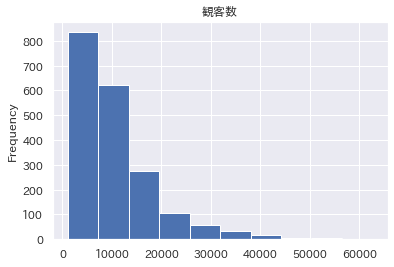

In [24]:
train = train[train["y"] > 0]
train["y"].plot.hist(title="観客数")
plt.show()

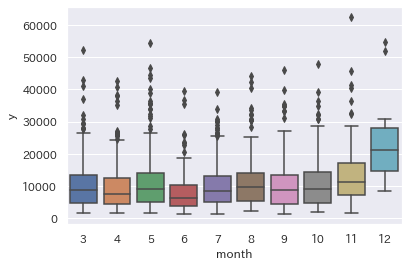

In [25]:
sns.boxplot(x="month", y="y", data=train)

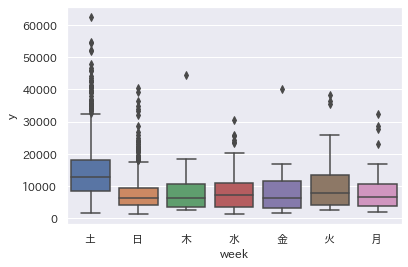

In [26]:
sns.boxplot(x="week", y="y", data=train)

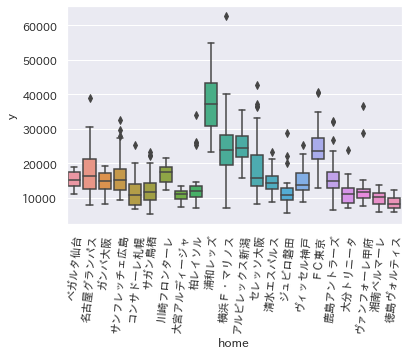

In [27]:
tmp_1 = train[train["stage"] == "Ｊ１"]
tmp_2 = train[train["stage"] == "Ｊ２"]
sns.boxplot(data=tmp_1, x="home", y="y")
plt.xticks(rotation=85)
plt.show()

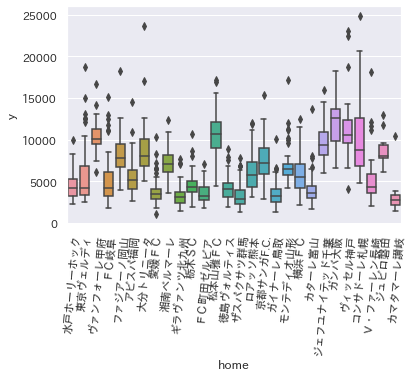

In [28]:
sns.boxplot(data=tmp_2, x="home", y="y")
plt.xticks(rotation=85)
plt.show()

In [29]:
def get_num(x):
    return len(x.split("／"))

In [30]:
train["tv_num"] = train["tv"].apply(get_num)

In [31]:
print(train["tv_num"].unique())

[4 3 5 2 1]


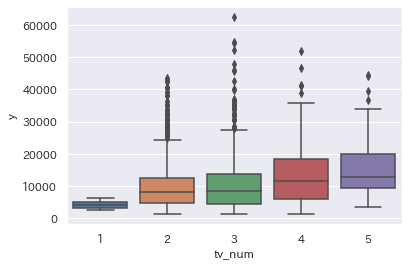

In [32]:
sns.boxplot(data=train, x="tv_num", y="y")
plt.show()

In [33]:
train["di"] = 0.81*train["temperature"]+0.01*train["humidity"]*(0.99*train["temperature"]-14.3)+46.3

In [34]:
train.head()

,id,y,year,stage,match,gameday,time,home,away,stadium,...,away_09,away_10,away_11,address,capa,month,week,match_num,tv_num,di
0,13994,18250,2012,Ｊ１,第１節第１日,03/10(土),14:04,ベガルタ仙台,鹿島アントラーズ,ユアテックスタジアム仙台,...,本山 雅志,大迫 勇也,ジュニーニョ,宮城県仙台市泉区七北田字柳78,19694,3,土,1,4,49.308449
1,13995,24316,2012,Ｊ１,第１節第１日,03/10(土),14:04,名古屋グランパス,清水エスパルス,豊田スタジアム,...,高木 俊幸,アレックス,大前 元紀,愛知県豊田市千石町7-2,40000,3,土,1,4,56.335297
2,13996,17066,2012,Ｊ１,第１節第１日,03/10(土),14:04,ガンバ大阪,ヴィッセル神戸,万博記念競技場,...,橋本 英郎,森岡 亮太,大久保 嘉人,大阪府吹田市千里万博公園5-2,21000,3,土,1,4,55.440237
3,13997,29603,2012,Ｊ１,第１節第１日,03/10(土),14:06,サンフレッチェ広島,浦和レッズ,エディオンスタジアム広島,...,柏木 陽介,原口 元気,田中 達也,広島県広島市安佐南区大塚西5-1-1,50000,3,土,1,4,55.518327
4,13998,25353,2012,Ｊ１,第１節第１日,03/10(土),14:04,コンサドーレ札幌,ジュビロ磐田,札幌ドーム,...,松浦 拓弥,菅沼 実,前田 遼一,北海道札幌市豊平区羊ヶ丘1,39232,3,土,1,4,64.550520


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


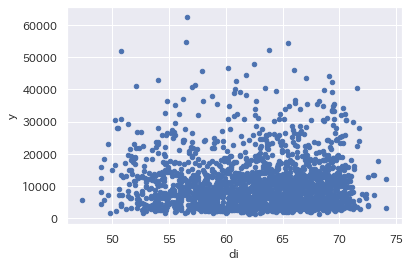

In [35]:
train.plot.scatter(x="di", y="y")

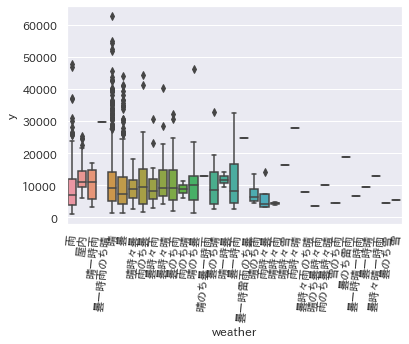

In [36]:
sns.boxplot(data=train, x="weather", y="y")
plt.xticks(rotation=85)
plt.show()

In [37]:
train["weather"].value_counts()

晴           969
曇           476
雨           186
屋内           55
曇のち雨         45
晴のち曇         33
雨のち曇         31
曇のち晴         30
曇時々雨         25
晴時々曇         23
曇一時雨         18
曇時々晴         18
晴のち雨          9
晴一時雨          7
雨のち晴          4
雨時々曇          4
晴時々雨          2
晴一時曇          2
雪のち雨          1
曇のち雷雨         1
曇時々雨のち晴       1
曇一時雨のち晴       1
曇一時雷雨のち曇      1
曇のち雪          1
曇時々晴一時雨       1
晴のち曇一時雨       1
雪             1
曇一時晴一時雨       1
雨のち曇時々晴       1
雨時々晴          1
曇一時晴          1
晴のち曇時々雨       1
晴時々雪          1
Name: weather, dtype: int64

In [38]:
def get_first_weather(x):
    return x[0]

In [39]:
train["weather_num"] = train["weather"].apply(get_first_weather)
train["weather_num"] = train["weather_num"].replace("雪", "雨")
train["weather_num"].value_counts()

晴    1048
曇     620
雨     229
屋      55
Name: weather_num, dtype: int64

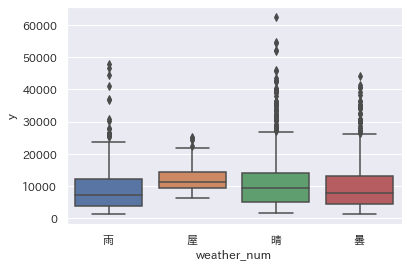

In [40]:
sns.boxplot(data=train, x="weather_num", y="y")

In [41]:
train.head()

,id,y,year,stage,match,gameday,time,home,away,stadium,...,away_10,away_11,address,capa,month,week,match_num,tv_num,di,weather_num
0,13994,18250,2012,Ｊ１,第１節第１日,03/10(土),14:04,ベガルタ仙台,鹿島アントラーズ,ユアテックスタジアム仙台,...,大迫 勇也,ジュニーニョ,宮城県仙台市泉区七北田字柳78,19694,3,土,1,4,49.308449,雨
1,13995,24316,2012,Ｊ１,第１節第１日,03/10(土),14:04,名古屋グランパス,清水エスパルス,豊田スタジアム,...,アレックス,大前 元紀,愛知県豊田市千石町7-2,40000,3,土,1,4,56.335297,屋
2,13996,17066,2012,Ｊ１,第１節第１日,03/10(土),14:04,ガンバ大阪,ヴィッセル神戸,万博記念競技場,...,森岡 亮太,大久保 嘉人,大阪府吹田市千里万博公園5-2,21000,3,土,1,4,55.440237,晴
3,13997,29603,2012,Ｊ１,第１節第１日,03/10(土),14:06,サンフレッチェ広島,浦和レッズ,エディオンスタジアム広島,...,原口 元気,田中 達也,広島県広島市安佐南区大塚西5-1-1,50000,3,土,1,4,55.518327,曇
4,13998,25353,2012,Ｊ１,第１節第１日,03/10(土),14:04,コンサドーレ札幌,ジュビロ磐田,札幌ドーム,...,菅沼 実,前田 遼一,北海道札幌市豊平区羊ヶ丘1,39232,3,土,1,4,64.550520,屋


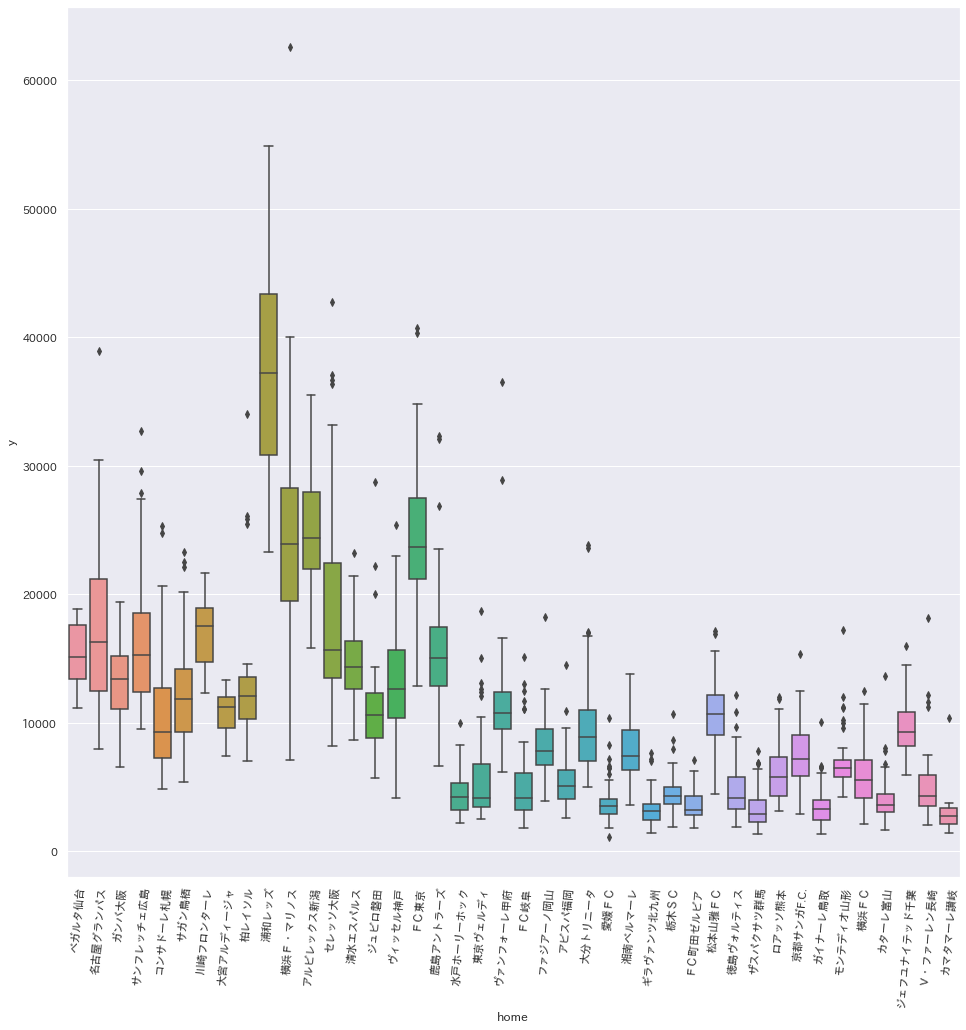

In [42]:
plt.figure(figsize=(16, 16))
sns.boxplot(data=train, x="home", y="y")
plt.xticks(rotation=85)
plt.show()

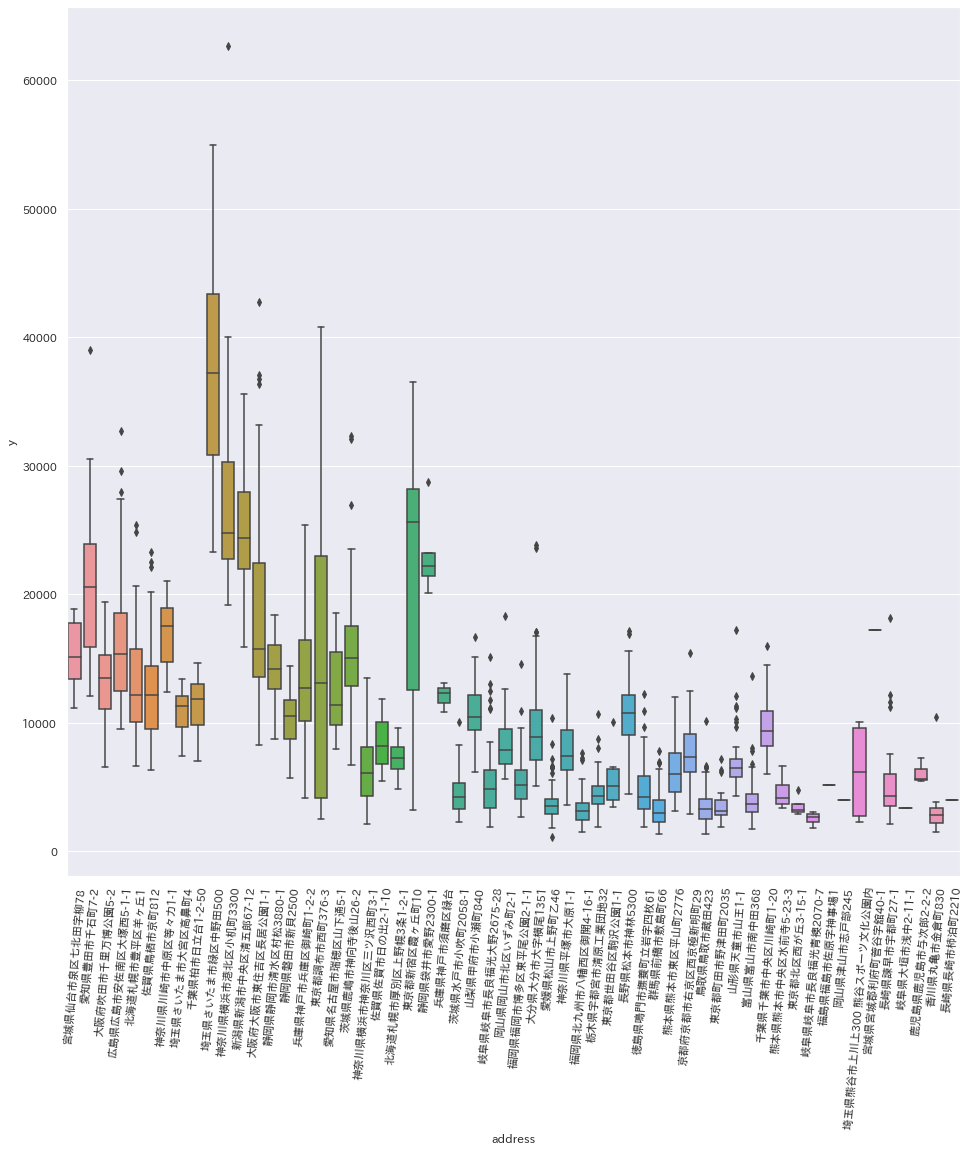

In [43]:
plt.figure(figsize=(16, 16))
sns.boxplot(data=train, x="address", y="y")
plt.xticks(rotation=85)
plt.show()

In [44]:
import re
tmp_0 = train.copy()

In [45]:
t = "神奈川県横浜市神奈川区三ツ沢西町3-1"
dt = t.find("県")

In [46]:
t[:t.find("県")]

'神奈川'

In [47]:
def get_prefecture(x):
    if re.search("県", x):
        return x[:x.find("県")+1]
    elif re.search("都", x):
        return x[:x.find("都")+1]
    elif re.search("府", x):
        return x[:x.find("府")+1]
    elif re.search("道", x):
        return x[:x.find("道")+1]

In [48]:
a = get_prefecture("北海道")
a

'北海道'

In [49]:
tmp_0["new_address"] = tmp_0["address"].apply(get_prefecture)

In [50]:
tmp_0.head()

,id,y,year,stage,match,gameday,time,home,away,stadium,...,away_11,address,capa,month,week,match_num,tv_num,di,weather_num,new_address
0,13994,18250,2012,Ｊ１,第１節第１日,03/10(土),14:04,ベガルタ仙台,鹿島アントラーズ,ユアテックスタジアム仙台,...,ジュニーニョ,宮城県仙台市泉区七北田字柳78,19694,3,土,1,4,49.308449,雨,宮城県
1,13995,24316,2012,Ｊ１,第１節第１日,03/10(土),14:04,名古屋グランパス,清水エスパルス,豊田スタジアム,...,大前 元紀,愛知県豊田市千石町7-2,40000,3,土,1,4,56.335297,屋,愛知県
2,13996,17066,2012,Ｊ１,第１節第１日,03/10(土),14:04,ガンバ大阪,ヴィッセル神戸,万博記念競技場,...,大久保 嘉人,大阪府吹田市千里万博公園5-2,21000,3,土,1,4,55.440237,晴,大阪府
3,13997,29603,2012,Ｊ１,第１節第１日,03/10(土),14:06,サンフレッチェ広島,浦和レッズ,エディオンスタジアム広島,...,田中 達也,広島県広島市安佐南区大塚西5-1-1,50000,3,土,1,4,55.518327,曇,広島県
4,13998,25353,2012,Ｊ１,第１節第１日,03/10(土),14:04,コンサドーレ札幌,ジュビロ磐田,札幌ドーム,...,前田 遼一,北海道札幌市豊平区羊ヶ丘1,39232,3,土,1,4,64.550520,屋,北海道


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 <a list of 33 Text xticklabel objects>)

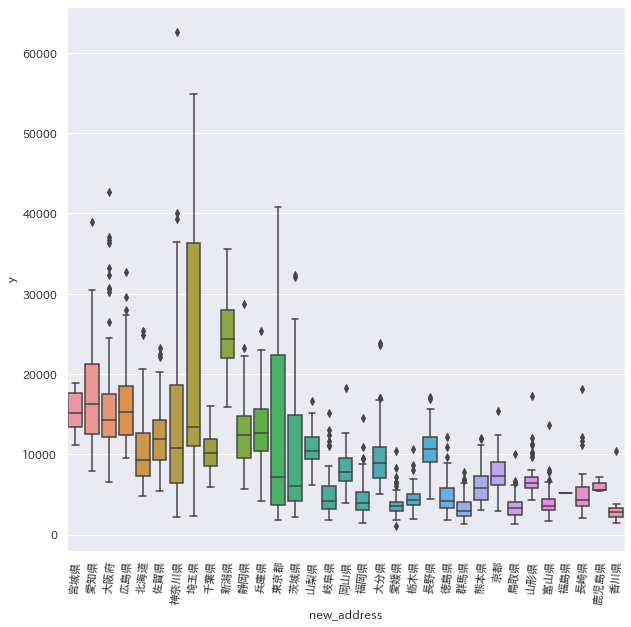

In [51]:
plt.figure(figsize=(10, 10))
sns.boxplot(data=tmp_0, x="new_address", y="y")
plt.xticks(rotation=85)

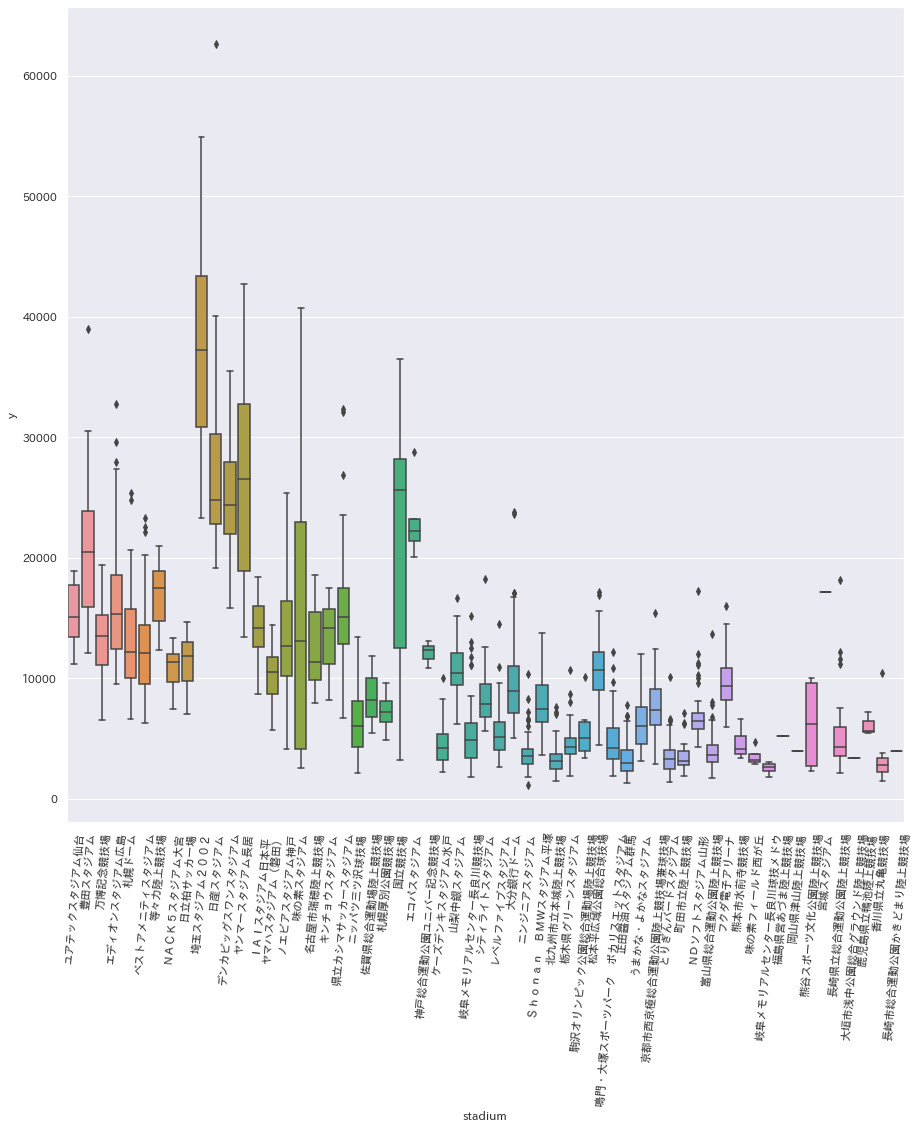

In [52]:
plt.figure(figsize=(15, 15))
sns.boxplot(data=tmp_0, x="stadium", y="y")
plt.xticks(rotation=85)
plt.show()

In [53]:
tmp_0["away"] = tmp_0["away"].replace("ザスパ草津", "ザスパクサツ群馬")
tmp_0["home_team"] = tmp_0["home_team"].replace("ザスパ草津", "ザスパクサツ群馬")

In [54]:
print(tmp_0["away"].nunique())
tmp_0["away"].unique()

42


array(['鹿島アントラーズ', '清水エスパルス', 'ヴィッセル神戸', '浦和レッズ', 'ジュビロ磐田', 'セレッソ大阪',
       'アルビレックス新潟', 'ＦＣ東京', '横浜Ｆ・マリノス', '柏レイソル', 'ベガルタ仙台', '大宮アルディージャ',
       'ガンバ大阪', 'サンフレッチェ広島', 'サガン鳥栖', 'コンサドーレ札幌', '名古屋グランパス', '川崎フロンターレ',
       '横浜ＦＣ', '松本山雅ＦＣ', '栃木ＳＣ', 'ガイナーレ鳥取', 'カターレ富山', 'ロアッソ熊本',
       'ザスパクサツ群馬', 'ＦＣ町田ゼルビア', '京都サンガF.C.', '徳島ヴォルティス', '大分トリニータ',
       'アビスパ福岡', 'モンテディオ山形', 'ＦＣ岐阜', '湘南ベルマーレ', 'ジェフユナイテッド千葉',
       'ギラヴァンツ北九州', '水戸ホーリーホック', '愛媛ＦＣ', 'ヴァンフォーレ甲府', 'ファジアーノ岡山',
       '東京ヴェルディ', 'Ｖ・ファーレン長崎', 'カマタマーレ讃岐'], dtype=object)

In [55]:
print(tmp_0["home"].nunique())
tmp_0["home"].unique()

42


array(['ベガルタ仙台', '名古屋グランパス', 'ガンバ大阪', 'サンフレッチェ広島', 'コンサドーレ札幌', 'サガン鳥栖',
       '川崎フロンターレ', '大宮アルディージャ', '柏レイソル', '浦和レッズ', '横浜Ｆ・マリノス', 'アルビレックス新潟',
       'セレッソ大阪', '清水エスパルス', 'ジュビロ磐田', 'ヴィッセル神戸', 'ＦＣ東京', '鹿島アントラーズ',
       '水戸ホーリーホック', '東京ヴェルディ', 'ヴァンフォーレ甲府', 'ＦＣ岐阜', 'ファジアーノ岡山', 'アビスパ福岡',
       '大分トリニータ', '愛媛ＦＣ', '湘南ベルマーレ', 'ギラヴァンツ北九州', '栃木ＳＣ', 'ＦＣ町田ゼルビア',
       '松本山雅ＦＣ', '徳島ヴォルティス', 'ザスパクサツ群馬', 'ロアッソ熊本', '京都サンガF.C.', 'ガイナーレ鳥取',
       'モンテディオ山形', '横浜ＦＣ', 'カターレ富山', 'ジェフユナイテッド千葉', 'Ｖ・ファーレン長崎',
       'カマタマーレ讃岐'], dtype=object)

In [56]:
tmp_0["game_match_1"] = tmp_0["home"] + "VS" + tmp_0["away"]
tmp_0["game_match_2"] = tmp_0["away"] + "VS" + tmp_0["home"]

In [57]:
drop_column = ["id", "home_team", "away_team", "home_01", 
                "home_02", "home_03", "home_04", "home_05", "home_06", "home_07", "home_08", "home_09",
                "home_10", "home_11","away_01", "away_02", "away_03", "away_04", "away_05", "away_06",
                "away_07", "away_08", "away_09", "away_10", "away_11"]
tmp_1 = tmp_0.drop(columns=drop_column, axis=1)

In [58]:
print(tmp_1.columns)
print(tmp_1.info())

Index(['y', 'year', 'stage', 'match', 'gameday', 'time', 'home', 'away',
       'stadium', 'tv', 'home_score', 'away_score', 'weather', 'temperature',
       'humidity', 'referee', 'address', 'capa', 'month', 'week', 'match_num',
       'tv_num', 'di', 'weather_num', 'new_address', 'game_match_1',
       'game_match_2'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1952 entries, 0 to 1952
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   y             1952 non-null   int64  
 1   year          1952 non-null   int64  
 2   stage         1952 non-null   object 
 3   match         1952 non-null   object 
 4   gameday       1952 non-null   object 
 5   time          1952 non-null   object 
 6   home          1952 non-null   object 
 7   away          1952 non-null   object 
 8   stadium       1952 non-null   object 
 9   tv            1952 non-null   object 
 10  home_score    1952 non-null

In [59]:
tmp = pd.get_dummies(tmp_1[["weather_num", "week", "new_address", "stage", "home"]])
tmp_1 = pd.concat([tmp_1, tmp], axis=1)

In [60]:
remove_column = ["match", "week", "weather_num", "stage", "new_address", "stadium", "gameday", "time", "home", "away", "weather", 
                 "address", "referee", "tv", "game_match_1", "game_match_2", "temperature", "humidity", 'di']
df = tmp_1.drop(columns=remove_column, axis=1)

In [61]:
df.shape

(1952, 96)

In [62]:
X = df.drop(["y"], axis=1)
Y = df["y"]

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0)

In [66]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
lr = LGBMRegressor(objective="mse")
lr.fit(X_train, y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective='mse',
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [67]:
lr.score(X_train, y_train)
y_pred = lr.predict(X_test)

In [68]:
from sklearn.metrics import mean_squared_error

In [69]:
np.sqrt(mean_squared_error(y_test, y_pred))

2997.073155346357

In [70]:
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

Text(0, 0.5, 'prediction')

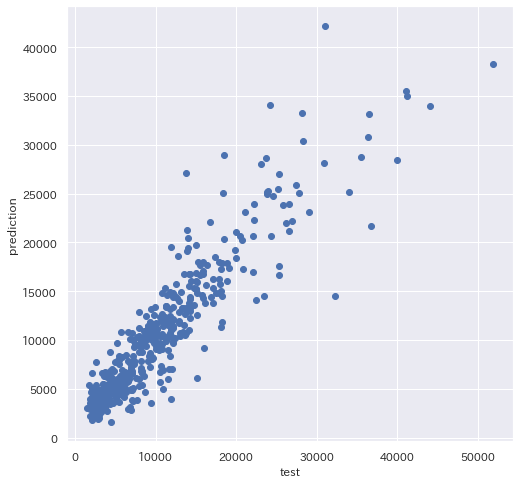

In [71]:
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred)
plt.xlabel("test")
plt.ylabel("prediction")

In [72]:
df.head()

,y,year,home_score,away_score,capa,month,match_num,tv_num,weather_num_屋,weather_num_晴,...,home_横浜ＦＣ,home_水戸ホーリーホック,home_浦和レッズ,home_清水エスパルス,home_湘南ベルマーレ,home_鹿島アントラーズ,home_ＦＣ岐阜,home_ＦＣ東京,home_ＦＣ町田ゼルビア,home_Ｖ・ファーレン長崎
0,18250,2012,1,0,19694,3,1,4,0,0,...,0,0,0,0,0,0,0,0,0,0
1,24316,2012,1,0,40000,3,1,4,1,0,...,0,0,0,0,0,0,0,0,0,0
2,17066,2012,2,3,21000,3,1,4,0,1,...,0,0,0,0,0,0,0,0,0,0
3,29603,2012,1,0,50000,3,1,4,0,0,...,0,0,0,0,0,0,0,0,0,0
4,25353,2012,0,0,39232,3,1,4,1,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
importance = lr.feature_importances_

In [74]:
importances = pd.DataFrame({"feature":lr.feature_name_,
                           "importance":lr.feature_importances_})

In [75]:
importances.groupby("feature").agg({"importance":"mean"}).sort_values("importance", ascending=False).head(30)

,importance
feature,
capa,743
match_num,548
away_score,200
home_score,182
month,153
year,134
tv_num,100
stage_Ｊ１,67
weather_num_晴,63


In [76]:
importances.groupby("feature").agg({"importance":"mean"}).sort_values("importance", ascending=False).tail(40)

,importance
feature,
new_address_鳥取県,5
new_address_茨城県,4
home_大宮アルディージャ,4
home_横浜ＦＣ,4
week_火,3
home_ギラヴァンツ北九州,3
home_鹿島アントラーズ,2
new_address_栃木県,1
new_address_群馬県,1


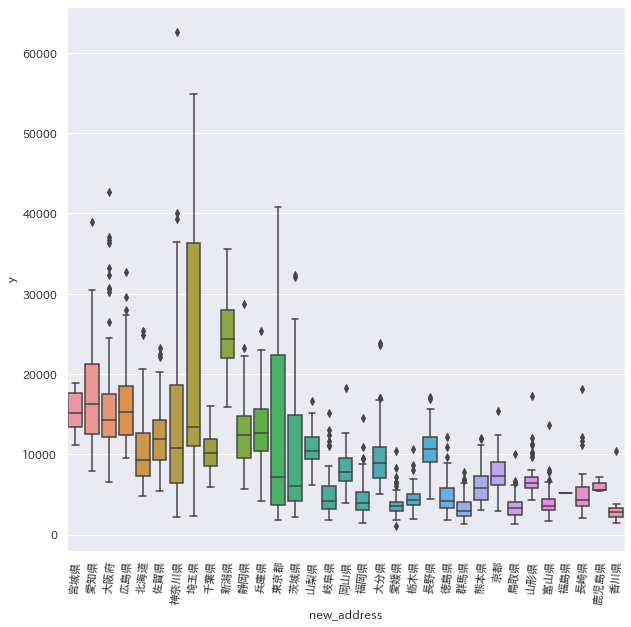

In [77]:
plt.figure(figsize=(10, 10))
sns.boxplot(data=tmp_1, x="new_address", y="y")
plt.xticks(rotation=85)
plt.show()

In [78]:
tmp_1.groupby("new_address").agg({"y":"median"}).sort_values("y", ascending=False)

,y
new_address,
新潟県,24388.5
愛知県,16261.0
広島県,15304.0
宮城県,15139.5
大阪府,14268.0
埼玉県,13356.5
兵庫県,12654.0
静岡県,12391.0
佐賀県,11892.0


In [79]:
tmp_1.groupby("new_address").agg({"capa":"mean"}).sort_values("capa", ascending=False)

,capa
new_address,
広島県,50000.000000
新潟県,42300.000000
東京都,41569.401575
大分県,40000.000000
埼玉県,39081.395349
愛知県,31627.906977
北海道,31156.470588
兵庫県,31081.021277
熊本県,30111.111111


In [80]:
tmp_2 = tmp_1[train["stage"] == "Ｊ１"]
tmp_3 = tmp_1[train["stage"] == "Ｊ２"]
print(len(tmp_2), len(tmp_3))

764 1188


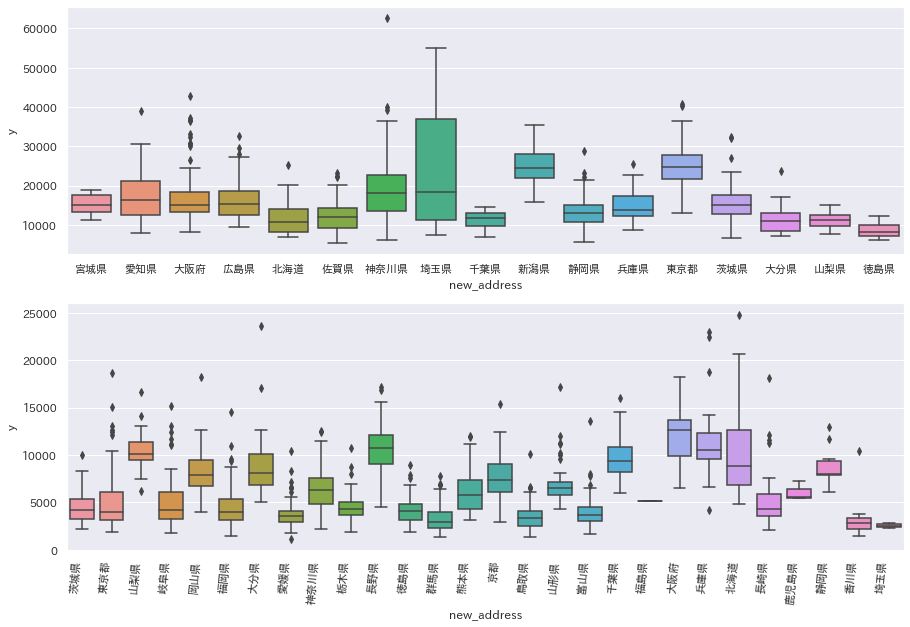

In [81]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))

sns.boxplot(data=tmp_2, x="new_address", y="y", ax=ax1)
sns.boxplot(data=tmp_3, x="new_address", y="y", ax=ax2)
plt.xticks(rotation=85, ha="right")
plt.show()

In [82]:
display(tmp_2.groupby("new_address").agg({"y":"median"}).sort_values("y", ascending=False))
tmp_3.groupby("new_address").agg({"y":"median"}).sort_values("y", ascending=False)

,y
new_address,
東京都,24633.0
新潟県,24388.5
埼玉県,18330.0
神奈川県,18088.0
愛知県,16261.0
広島県,15304.0
大阪府,15152.0
宮城県,15139.5
茨城県,15056.0


,y
new_address,
大阪府,12633.0
長野県,10715.5
兵庫県,10559.0
山梨県,10092.0
千葉県,9319.0
北海道,8803.5
大分県,8082.0
静岡県,8016.0
岡山県,7842.0


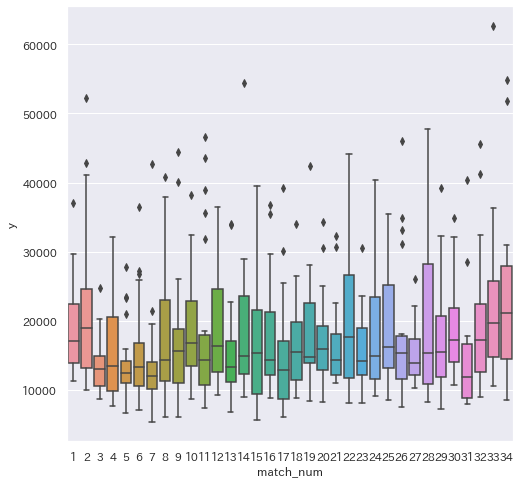

In [85]:
plt.figure(figsize=(8, 8))
sns.boxplot(data=tmp_1[tmp_1["stage"] == "Ｊ１"], x="match_num", y="y")

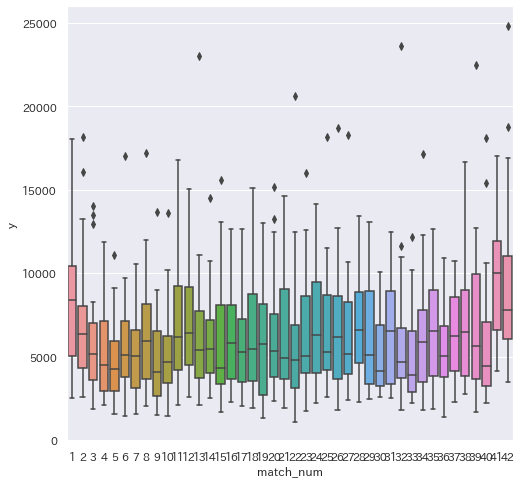

In [86]:
plt.figure(figsize=(8, 8))
sns.boxplot(data=tmp_1[tmp_1["stage"] == "Ｊ２"], x="match_num", y="y")

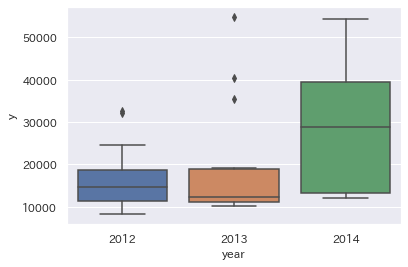

In [91]:
sns.boxplot(data=tmp_1[tmp_1["away"] == "セレッソ大阪"], x="year", y="y")

In [93]:
sns.boxplot(data=combine, x="prefecture", y="high_diff_score")

NameError: name 'combine' is not defined